# Домашняя работа

## Урок 2. 

### Задание начального уровня


Примените процедуру токенизации к файлу `brand_tweets_valid.csv`

Сколько *уникальных* токенов получилось?

In [15]:
# стоп-слова
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

In [16]:
import nltk
import string
import pandas as pd
from itertools import chain
import numpy as np

### YOUR CODE HERE ###
nltk.download('punkt', download_dir='.')
df = pd.read_csv("brand_tweets_valid.csv")
tweets = df["tweet_text"].values

tweets[:5]

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


array(['Wow! Google maps for mobile v5 demo at #sxsw. Very nice.',
       'The #google name was built on gettinng stuff out there and trying it with users to see what works. #marissagoogle #sxsw',
       '&quot;Apple opening a temporary store in Austin for SXSW and the iPad 2 launch:&quot; {link} #SXSW',
       '#tech Apple Opening Pop-Up Store In Austin For #SXSW {link}',
       'GSDM Google party is off the hook! #SXSW  {link}'], dtype=object)

In [17]:
#Количество уникальных токенов
X = [nltk.tokenize.word_tokenize(t) for t in tweets]
X_ = [[t for t in tweet if t not in stop_words] for tweet in X]

unique = set()
for tweet in X_:
    for t in tweet:
       unique.add(t)

print('Количество уникальных токенов:',len(unique))

Количество уникальных токенов: 2097


## Урок 3 

### Задание начального уровня

Потренируйтесь в нахождении матрицы схожести для валидационного сета

* загрузите `brand_tweets_valid.csv`
* примените объект `vectorizer`, обученный на датасете `brand_tweets.csv` (просто скопируйте этот код из урока)
* примените функцию `pairwise_distances` к полученной матрице

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
df_valid = pd.read_csv('brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df[df.tweet_text.isnull()].index, inplace=True)

### YOUR CODE HERE ###
vectorizer = CountVectorizer(tokenizer=nltk.tokenize.word_tokenize)

document_matrix = vectorizer.fit_transform(df.tweet_text.values)
document_matrix

<402x1900 sparse matrix of type '<class 'numpy.int64'>'
	with 8753 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.metrics import pairwise_distances

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")

tweet_distance.shape

(402, 402)

In [20]:
len(df_valid)

402

### Задание среднего уровня

Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с `id=14`.

In [21]:
test_tweet_index = 14

print(df_valid.iloc[test_tweet_index].tweet_text+'\n------------------------------\n')


### YOUR CODE HERE ###
t_d = np.argsort(tweet_distance[test_tweet_index, :])

df_valid.iloc[t_d[1:6]].tweet_text

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
------------------------------



249    just got mine &amp; i disagree RT  @mention Pe...
244    marcelosomers: New version of Google Maps for ...
94     Google will preview major new social service, ...
220    Yay! RT @mention Hoot! New Blog post: HootSuit...
184    Google's Marissa Meyers: &quot;Some of our pro...
Name: tweet_text, dtype: object

### Задание высокого уровня.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести.
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение.

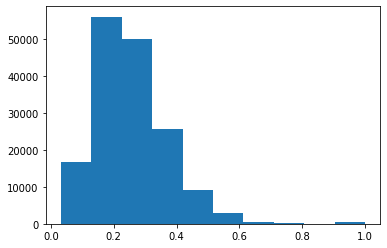

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

### YOUR CODE HERE ###
x,y = np.histogram(tweet_distance)
plt.hist(y[:-1], y, weights=x)
plt.show()

In [23]:
def more_similar(tweet_index, threshold, t_d):
    print(df_valid.iloc[tweet_index].tweet_text+'\n------------------------------')
    a = t_d[tweet_index, :].squeeze()
    indices = np.argwhere(a > threshold).squeeze()
    print(indices)
    print("More similar than ", threshold, ":")
    for i in indices:
        if i == tweet_index: continue
        print("Tweet #", i, ": ", df_valid.iloc[i].tweet_text)

more_similar(14, 0.5, tweet_distance)

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
------------------------------
[ 14 132]
More similar than  0.5 :
Tweet # 132 :  Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2


## Урок 4.

### Задание начального уровня

Обучите модель Skip-Gram (передав параметр `sg=1`. Какие top-10 слов больше всего похожи на слово `iphone` ?

In [24]:
df_valid = pd.read_csv('brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df[df.tweet_text.isnull()].index, inplace=True)
df_valid["tokenized"] = df_valid["tweet_text"].apply(lambda x: nltk.word_tokenize(x))

In [25]:
from gensim.models import Word2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

texts = df_valid.tokenized.values

model = Word2Vec(texts, vector_size=10, window=7, min_count=2, workers=4, epochs=10, sg=1)

C:\Users\HP\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
2021-08-19 18:50:19,285 : INFO : collecting all words and their counts
2021-08-19 18:50:19,287 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-08-19 18:50:19,299 : INFO : collected 2202 word types from a corpus of 9827 raw words and 402 sentences
2021-08-19 18:50:19,302 : INFO : Creating a fresh vocabulary
2021-08-19 18:50:19,331 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 739 unique words (33.560399636693916%% of original 2202, drops 1463)', 'datetime': '2021-08-19T18:50:19.330988', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AM

In [26]:
model.wv.most_similar('iphone')

[('Atrix', 0.9931920170783997),
 ('does', 0.990644633769989),
 ('experience', 0.9904371500015259),
 ('seem', 0.9898284077644348),
 ('Managed', 0.9897992014884949),
 ('amazing', 0.9886273741722107),
 ('cool', 0.98694908618927),
 ('few', 0.9857677817344666),
 ('IPad', 0.9856570959091187),
 ('Ready', 0.9856477379798889)]